
Iteration 1 clusters: {'C1': [0, 1, 6], 'C2': [2, 4, 8], 'C3': [3, 5, 7]}
Updated centroids: {'C1': array([2.        , 2.66666667]), 'C2': array([3.66666667, 8.        ]), 'C3': array([9.        , 5.33333333])}

Iteration 2 clusters: {'C1': [0, 1, 6], 'C2': [2, 4, 8], 'C3': [3, 5, 7]}
Updated centroids: {'C1': array([2.        , 2.66666667]), 'C2': array([3.66666667, 8.        ]), 'C3': array([9.        , 5.33333333])}


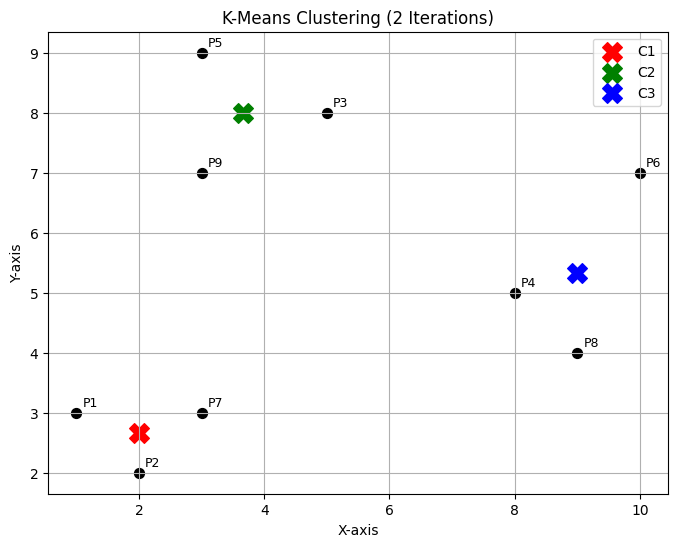

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data points
points = {
    "P1": (1,3), "P2": (2,2), "P3": (5,8), "P4": (8,5), "P5": (3,9),
    "P6": (10,7), "P7": (3,3), "P8": (9,4), "P9": (3,7)
}

X = np.array(list(points.values()))

# 2. Initialize centroids
centroids = {
    "C1": np.array(points["P7"]),  # (3,3)
    "C2": np.array(points["P9"]),  # (3,7)
    "C3": np.array(points["P8"])   # (9,4)
}

def assign_clusters(X, centroids):
    clusters = {c: [] for c in centroids}
    for i, point in enumerate(X):
        # compute distances to each centroid
        distances = {c: np.linalg.norm(point - centroids[c]) for c in centroids}
        # assign to closest centroid
        nearest = min(distances, key=distances.get)
        clusters[nearest].append(i)
    return clusters

def update_centroids(X, clusters):
    new_centroids = {}
    for c in clusters:
        if clusters[c]:  # avoid empty cluster
            new_centroids[c] = np.mean(X[clusters[c]], axis=0)
        else:
            new_centroids[c] = centroids[c]
    return new_centroids

# 3. Perform 2 iterations manually
for iteration in range(1, 3):
    clusters = assign_clusters(X, centroids)
    print(f"\nIteration {iteration} clusters:", clusters)
    centroids = update_centroids(X, clusters)
    print(f"Updated centroids:", centroids)

# 4. Plot points and centroids
colors = {"C1":"red", "C2":"green", "C3":"blue"}
plt.figure(figsize=(8,6))

# plot points with labels
for i, (label, coord) in enumerate(points.items()):
    plt.scatter(coord[0], coord[1], c="black", s=50)
    plt.text(coord[0]+0.1, coord[1]+0.1, label, fontsize=9)

# plot centroids
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], 
                c=colors[c], marker="X", s=200, label=c)

plt.title("K-Means Clustering (2 Iterations)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()
